# Решающие деревья

<h3> Plan </h3>

* **Введение** 
 - Постановка задачи и примеры
 - Деревья для решения задач классификации и регрессии
 
 
* **Обучение деревьев решений**
 - Алгоритм обучения
 - Критерии информативности
 - Категориальные признаки в деревьях
 

* **Применение решающих деревьев на практике**
  - Визуализация деревьев (Graphviz)
  

* **Сравнение с линейными моделями**
  - Линейно разделимая выборка
  - Нелинейная зависимость
  - Оценка времени работы
  
  
* **Основные выводы**
  - Преимущества и недостатки
  - Способы устранения недостатков: прунинг, композиции (леса) деревьев


# Введение

###  1. Постановка задачи и примеры


#### Красивая визуализация

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

Строим дерево:

###### Шаг 1

<img src='pics/tree_1.png' Width=900>

###### Шаг 2

<img src='pics/tree_2.png' Width=900>

###### Шаг 3

<img src='pics/tree_3.png' Width=900>

###### Шаг 4

<img src='pics/tree_4.png' Width=900>

###### Тестирование

<img src='pics/tree_test.png' Width=900>

#### Дерево для задачи классификации:
<img src='pics/0_tree.png' Width=900>

#### Дерево для задачи регрессии:
<img src='pics/RegressionDT.png' Width=900>

### 2. Построение деревьев

* Обучающая выборка $(x_i,y_i)_{i=1}^l\in X \times Y$
* Как разбить на две части: $R_1(j,s)=\{x|x_j \leq s\}$ и $R_2(j,s) = \{x | x_j > s \}$ с использованием критерия Q(X, j, s)?

Найдём наилучшие значения $j$ и $s$, создадим корневую вершину дерева, поставив ей в соответствие функцию (предикат) $[x_j \leq s ]$. Объекты выборки будут разбиты на две части и попадут либо в левое, либо в правое поддерево. Продолжим эту процедуру для каждой подвыборки. Если после очередного разбиения в одной из половин окажутся объекты одного из классов, то создадим листовую вершину, которой будет соответствовать класс попавших в неё объектов.

Жадный алгоритм переусложняет структуру дерева:


<img src='pics/0_greedy_tree.png' Width=900>

### 3. Критерии информативности

* $R_m$ - множество объектов обучающей выборки, попавших в вершину $m$.
* $p_{mk}$ - доля объектов класса $k\in\{1, ..., K\}$, попавших в вершину $m$: $p_{mk}=\frac{1}{N_m} \sum\limits_{x_i\in R_m} [y_i = k]$, где  $N_m=|R_m|$.
* $k_m = arg \max\limits_{k} p_{mk}$ - класс, чьих представителей больше всего среди объектов, попавших в вершину $m$.


#### 3.1 Ошибка классификации

Если бы вершина $m$ была листовой и относила все объекты к классу $k$:

$$
F_E(R_m) = \frac{1}{N_m} \sum\limits_{x_i \in R_m} [y_i \neq k_m].
$$

Критерий информативности при ветвлении вершины $m$: ($l$ и $r$ - правые и левые вершины)

$$
Q_E(R_m, j, s) = F_E (R_m) - \frac{N_l}{N_m} F_E(R_l) - \frac{N_r}{N_m} F_E(R_r).
$$

Грубый критерий - учитывает частоту $p_{m, k_m}$ лишь одного класса

<img src='pics\0_task1.png' Width=1500>

In [6]:
# Решение

#### 3.2 Индекс Джини
* Функционал имеет вид $$ F_G(R_m) = \sum\limits_{k \neq k'}p_{mk}p_{mk'}$$
* Аналогично определяется критерий информативности:
$$
Q_G(R_m, j, s) = F_G (R_m) - \frac{N_l}{N_m} F_G(R_l) - \frac{N_r}{N_m} F_G(R_r).
$$

<img src='pics\0_task2.png' Width=2000>

In [ ]:
# Решение

<img src='pics\0_task3.png' Width=2000>

In [5]:
# Решение

* В чём смысл максимизации критерия информативности Джини?
<img src='pics\0_gini_meaning.png' Width=800>

* Число объектов класса $k$, попавших в поддерево $l$: $$p_{lk}N_l$$.
* Число пар объектов $(x_i, x_j)$, таких что $y_i = y_j = k$ и оба объекта находятся в одном поддереве $l$:
$$ \sum\limits_{k=1}^K p_{lk}^2 N_l^2$$
* Итого для обоих поддеревьев:
$$ \sum\limits_{k=1}^K p_{lk}^2 N_l^2 + \sum\limits_{k=1}^K p_{rk}^2 N_r^2 $$

Максимизация величины критерия Джини = Максимизация числа пар объектов одного класса, оказавшихся в одном поддереве

#### 3.3 Энтропийный критерий (критерий Шеннона)
* Рассмотрим дискретную случайную величину, принимающую $K$ Значений с вероятностями $p_1, ..., p_K$ соответственно. ''Энтропия'' этой случайной величины определяется как:
$$
H(p) = -\sum\limits_{k=1}^K p_k log_2 p_k
$$

<img src='pics\0_task4.png' Width=1200>
Подсказка: неравенство Йенсена: для любой вогнутой функции $f$ выполнено:
$$
f(\sum\limits_{i=1}^n a_i x_i) \geq \sum\limits_{i=1}^n a_i f(x_i)
$$


* Энтропия ограничена снизу нулём, причём минимум достигается на вырожденных распределениях ($p_i = 1, p_j = 0: i\neq j$)
* Энтропийный критерий:
$$
Q_H(R_m, j, s) = H(p_m) - \frac{N_l}{N_m} H(p_l) - \frac{N_r}{N_m} H(p_r)
$$
где $p_i = (p_{i1}, ..., p_{iK})$ - распределение классов в $i$-й вершине.
* Критерий отдаёт предпочтение более "вырожденным" распределениям классов.

#### Пример: предсказание цвета шарика по его координате
<img src='pics\0_entropy_statement.png' Width=1200>

* Вероятности вытаскивания синего и жёлтого шариков соответственно: $$ p_1 = \frac{9}{20}, p_2 = \frac{11}{20}$$
* Энтропия такого состояния: $$ S_0 = -\frac{9}{20} log_2 \frac{9}{20} - \frac{11}{20} log_2 \frac{11}{20} \approx 1$$

Как изменится энтропия, если разбить шарики на две группы?
<img src='pics\0_entropy_first_split.png' Width=1200>

* Для первой группы: $$ S_1 = -\frac{8}{13} log_2 \frac{8}{13} - \frac{5}{13} log_2 \frac{5}{13} \approx 0,96 $$

* И для второй: $$ S_2 = -\frac{6}{7} log_2 \frac{6}{7} - \frac{1}{7} log_2 \frac{1}{7} \approx 0,6 $$

* Энтропия уменьшилась в обеих группах. 
* Мера прироста информации:
$$IG(Q) = S_0 - \sum\limits_{i=1}^q \frac{N_i}{N} S_i $$
где q - число групп после разбиения, $N_i$ - число элементов выборки, у которых признак $Q$ имеет $i$-е значение.
* $$IG(x\leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16$$

<img src='pics\0_entropy_split.png' Width=800>

* Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше либо равна 18", для левой – еще три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($log_2 ⁡1=0$), что соответствует представлению, что группа шариков одного цвета – упорядоченная.

<img src='pics/criteria.png' Width=700>

### Работа с категориальными признаками

#### Numerical encoding

<img src='pics/numeric_1.png' Width=300>

<img src='pics/numeric_2.png' Width=700>

#### Binary encoding

<img src='pics/binary_1.png' Width=400>

<img src='pics/binary_2.png' Width=700>

#### One-hot encoding

<img src='pics/one_hot_encoding_1.png' Width=500>

<img src='pics/one_hot_encoding_2.png' Width=700>

- Чем более датасет сбалансирован, тем хуже помогают энкодинги категориальных признаков.
- Лучше использовать numeric/binary encoding вместо one-hot encoding для обучения деревьев

#### Mean target encoding

- Заменяем категориальный признак на среднее ТАРГЕТА
- Иногда добавляют дисперсию таргета как еще один признак

<img src='pics/mean_target_2.png' Width=700>

- Зачем это нужно?

<img src='pics/mean_target_trees.png' Width=500>

Глубина деревьев фиксирована -> нет возможности рассматривать все признаки из one-hot encoding. Mean target encoding создает признак, разделение по которому в узле дерева коррелирует с разделением по таргету.

###### Возможная опасность: может появиться лик в данных!

Как этого избежать:
- считаем mean target encoding только на кросс-валидации: среднее таргета текущего фолда считается по выборке из остальных фолдов
- считаем по формуле:
$$ \lambda(n) \cdot mean(category) + (1 - \lambda(n)) \cdot mean(dataset)  $$
(под $mean(X)$ понимается средний таргет объектов из $X$)

Как еще можно закодировать категориальный признак (при условии бинарного таргета)?

- Weight of loss
- Count encoding = sum(target)
- Diff = count(1) - count(0)

# Визуализация в решающих деревьях

**Примечание:**

Для данного блокнота понадобятся pydotplus (питоновский модуль) и GraphViz

* На macOS это решается так:

 * sudo pip install pydotplus
 * brew install graphviz

* В linux должно работать то же самое с заменой brew на sudo apt-get

* В windows нужно сначала установить graphviz отсюда: http://www.graphviz.org/Download_windows.php
 * Затем добавить путь к папке bin в PATH (например, "C:\libs\Graphviz2.38\bin")
 * После чего выполнить pip install pydotplus

In [1]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
## FOR HAPPY WINDOWS USERS
import os
GRAPHVIZ_INSTALL_BIN_DIR = r'C:/libs/graphviz/bin/'
os.environ["PATH"] += os.pathsep + GRAPHVIZ_INSTALL_BIN_DIR

## Ирисы Фишера

In [2]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Организуем данные в виде таблицы

In [3]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['target'] = iris.target

In [4]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Строим дерево "руками"

In [5]:
iris_sample = iris_data.sample(n = 13, random_state = 111)

In [6]:
iris_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,5.1,3.4,1.5,0.2,0
26,5.0,3.4,1.6,0.4,0
109,7.2,3.6,6.1,2.5,2
123,6.3,2.7,4.9,1.8,2
77,6.7,3.0,5.0,1.7,1
24,4.8,3.4,1.9,0.2,0
0,5.1,3.5,1.4,0.2,0
139,6.9,3.1,5.4,2.1,2
144,6.7,3.3,5.7,2.5,2
56,6.3,3.3,4.7,1.6,1


In [7]:
iris_sample[iris_sample.target != 0].sort_values(by = 'petal length (cm)')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
56,6.3,3.3,4.7,1.6,1
123,6.3,2.7,4.9,1.8,2
77,6.7,3.0,5.0,1.7,1
119,6.0,2.2,5.0,1.5,2
139,6.9,3.1,5.4,2.1,2
144,6.7,3.3,5.7,2.5,2
109,7.2,3.6,6.1,2.5,2
131,7.9,3.8,6.4,2.0,2


## Строим дерево с помощью sklearn

In [8]:
model = tree.DecisionTreeClassifier()
model.fit(iris_sample.iloc[:, :-1], iris_sample.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

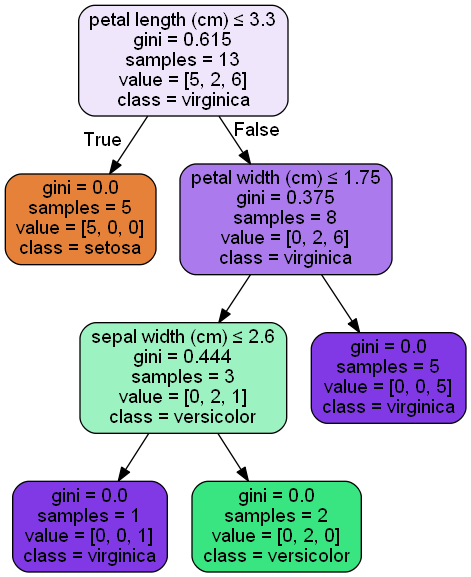

In [10]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

## А теперь повторим для большого набора данных

In [11]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
model.fit(iris_data.iloc[:, :-1], iris_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

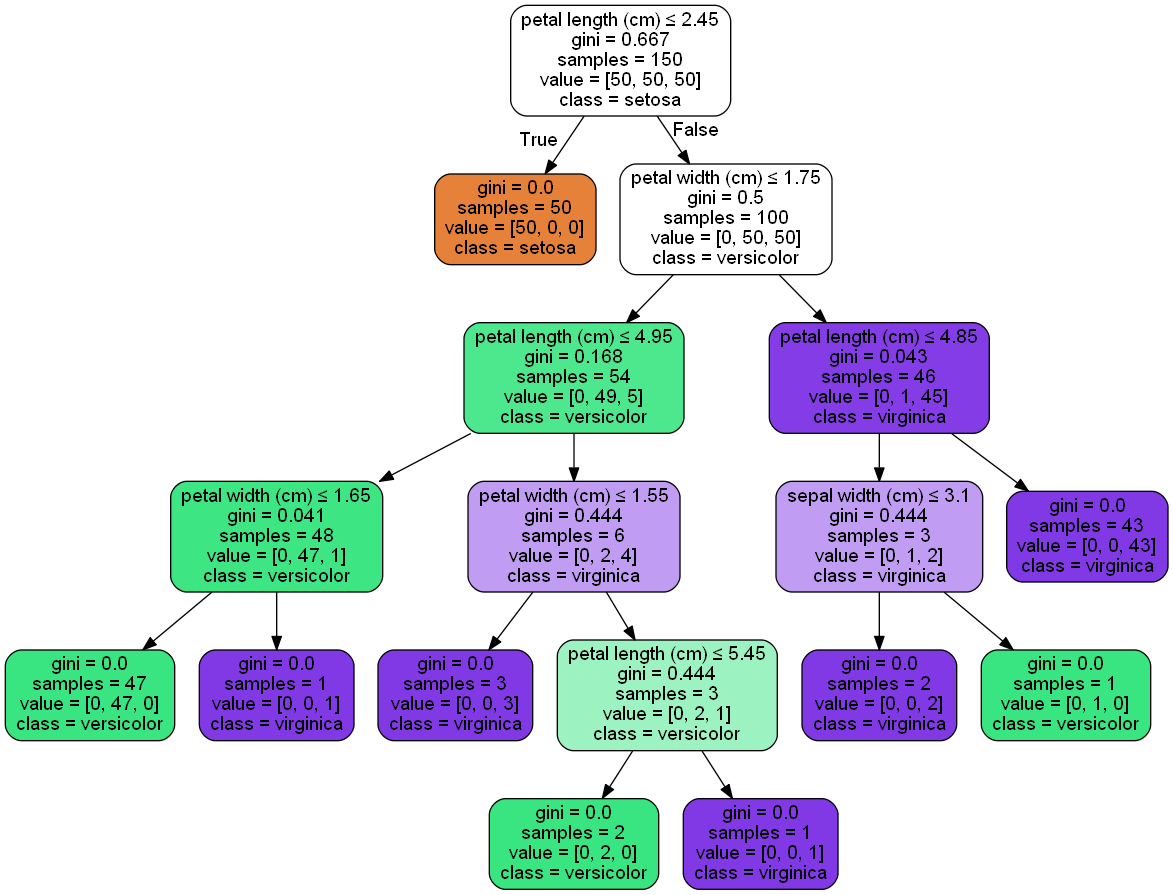

In [14]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())  

## Оценим качество

In [15]:
train_data, test_data, train_target, test_target = train_test_split(iris_data.iloc[:, :-1], iris_data.target,
                                                                   test_size = 0.2)

In [16]:
model.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
test_predictions = model.predict(test_data)

In [18]:
print(test_predictions)

[0 2 0 0 2 0 2 2 1 0 1 0 0 1 2 2 0 0 0 0 1 0 0 1 1 0 0 1 0 0]


In [19]:
print(test_target.values)

[0 2 0 0 2 0 2 2 1 0 1 0 0 1 2 2 0 0 0 0 1 0 0 1 1 0 0 1 0 0]


In [20]:
print(accuracy_score(test_target, test_predictions))

1.0


In [21]:
train_predictions = model.predict(train_data)

In [22]:
print(accuracy_score(train_target, train_predictions))

1.0


In [23]:
print(classification_report(test_target, test_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      1.00      1.00         7
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30



In [24]:
dot_data = tree.export_graphviz(model, out_file="tree.out",
                                feature_names=iris.feature_names,
                                class_names=iris.target_names, filled=True,
                                rounded=True,special_characters=True)

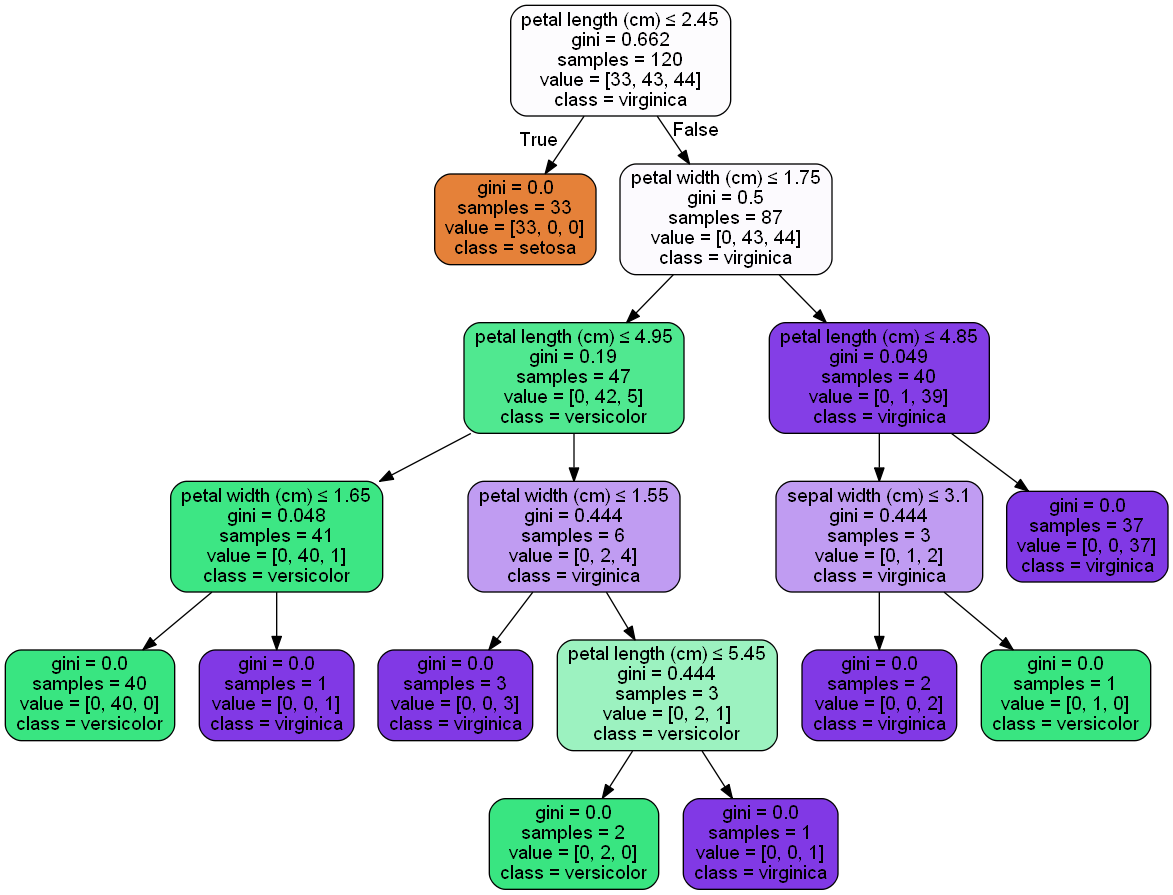

In [25]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

## Исследуем "устойчивость" модели

**Вариант 1:** деревья, построенные на немного отличающихся подмножествах обучающей выборки

См. пункт 2 в списке недостатков деревьев в документации sklearn: http://scikit-learn.org/stable/modules/tree.html

In [26]:
model = tree.DecisionTreeClassifier(max_depth=4)
print(len(train_data))

120


Построим два решающих дерева: одно выкинув из обучающей выборки diff последних примеров, другое - выкинув из нее diff первых примеров.

При diff = 10 (8,3% выборки) структура дерева такая же, при diff = 20 (16,6%) дерево уже выглядит по-другому и, кроме того, есть различия даже в выборе признака в одном из верхних сплитов

In [27]:
diff = 20

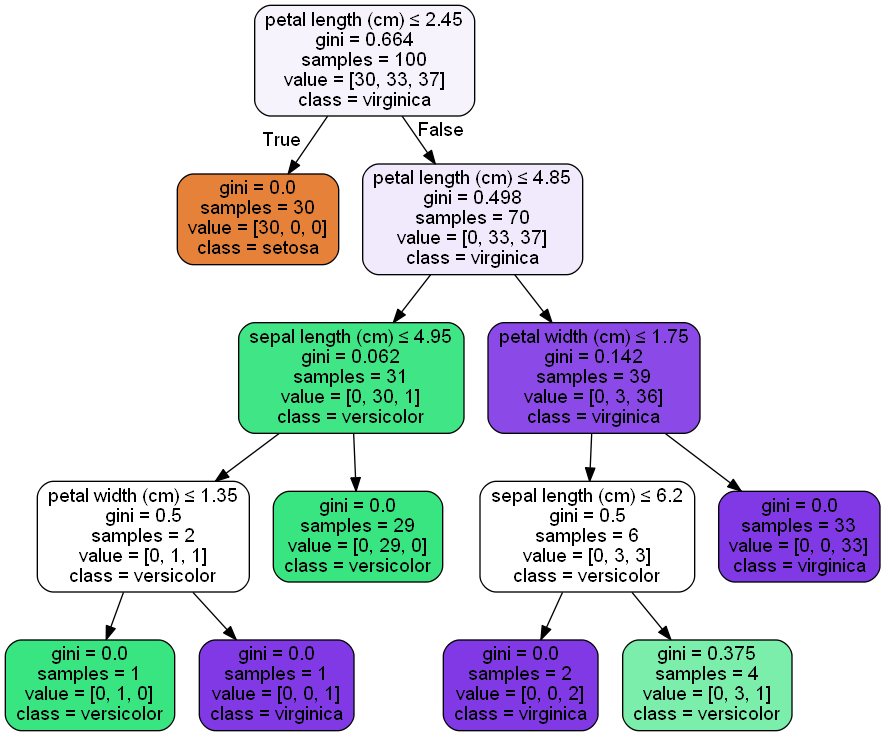

In [28]:
model.fit(train_data[:-diff], train_target[:-diff])
filename = "first_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

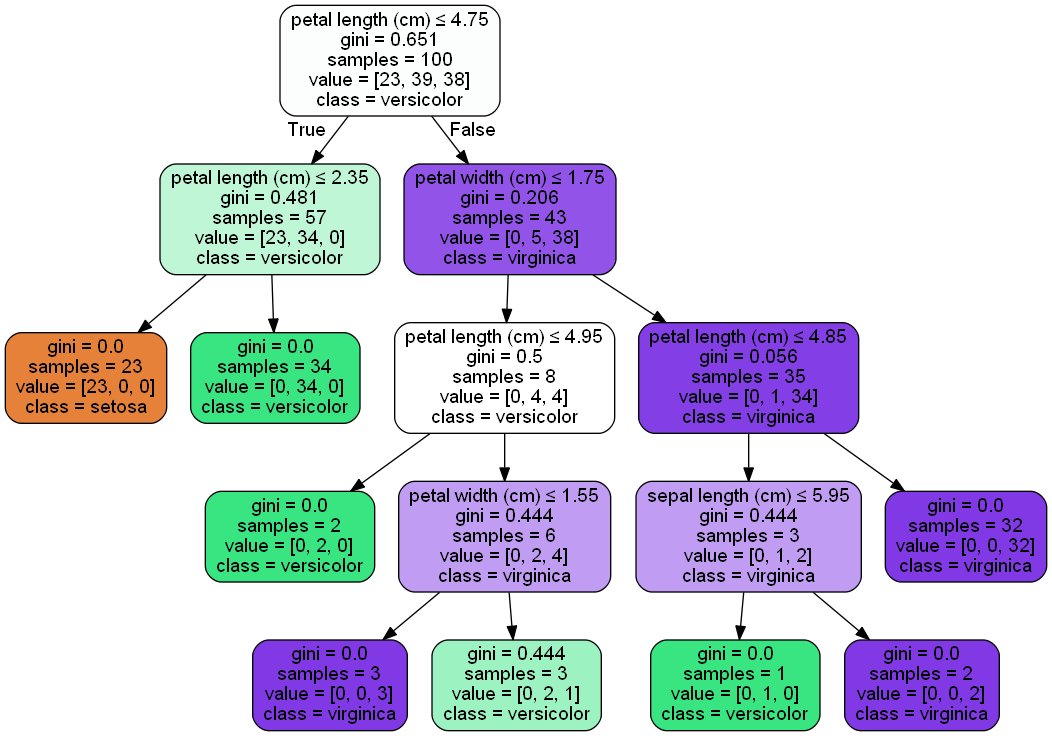

In [29]:
model.fit(train_data[diff:], train_target[diff:])
filename = "first_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

In [30]:
from sklearn.datasets import load_diabetes

In [31]:
diabetes = load_diabetes()

## Просто построим регрессионное дерево

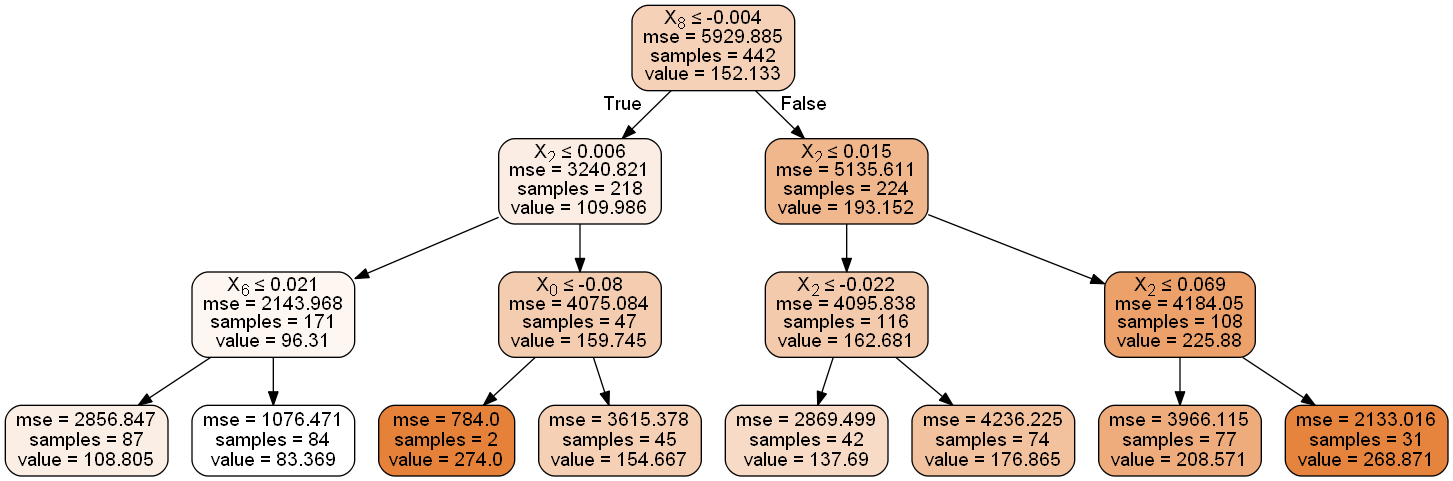

In [32]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target)
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Удалим часть выборки (эффект такой же как в классификации)

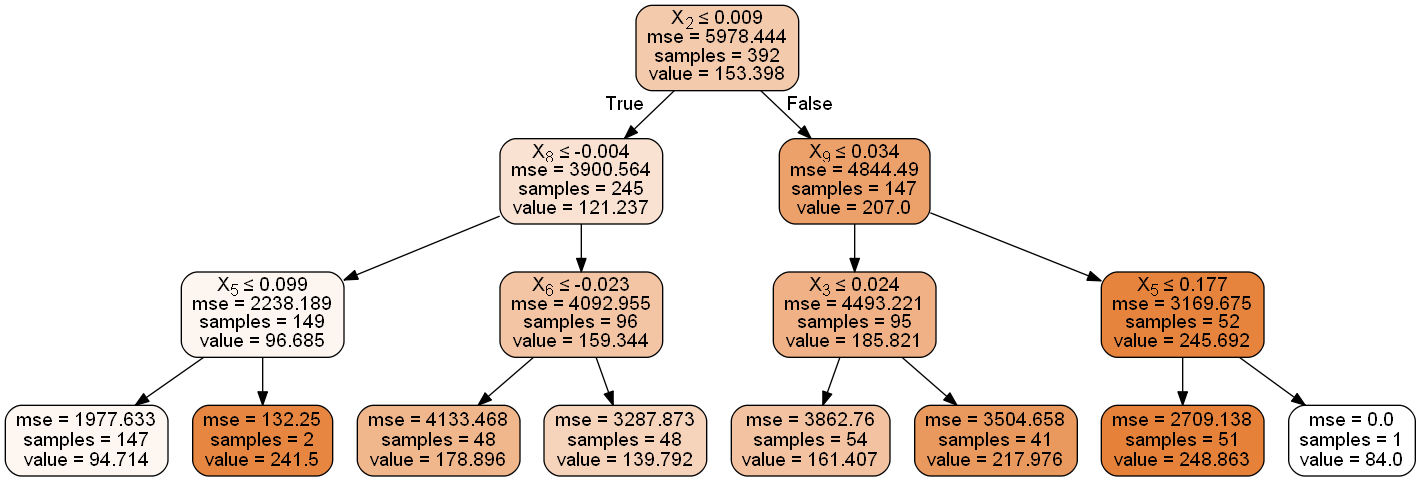

In [33]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data[50:], diabetes.target[50:])
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

Теперь удалим немножко выборки (тогда будет почти исходное дерево)

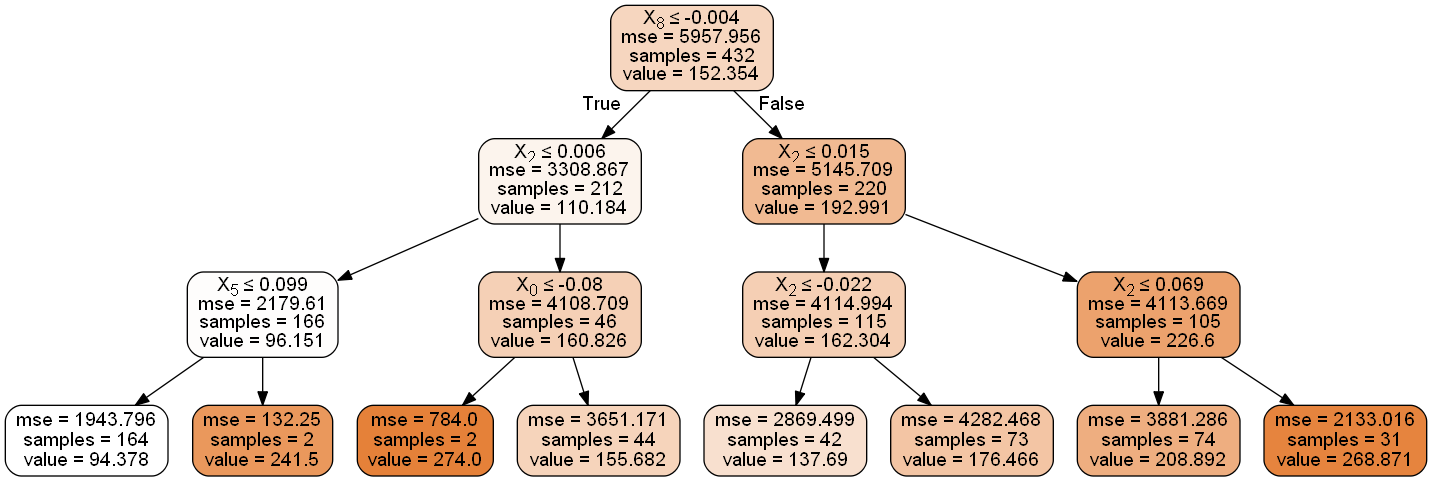

In [34]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data[10:], diabetes.target[10:])
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Добавим выбросы - ответы первых 10 точек заменим на случайные (дерево изменится)

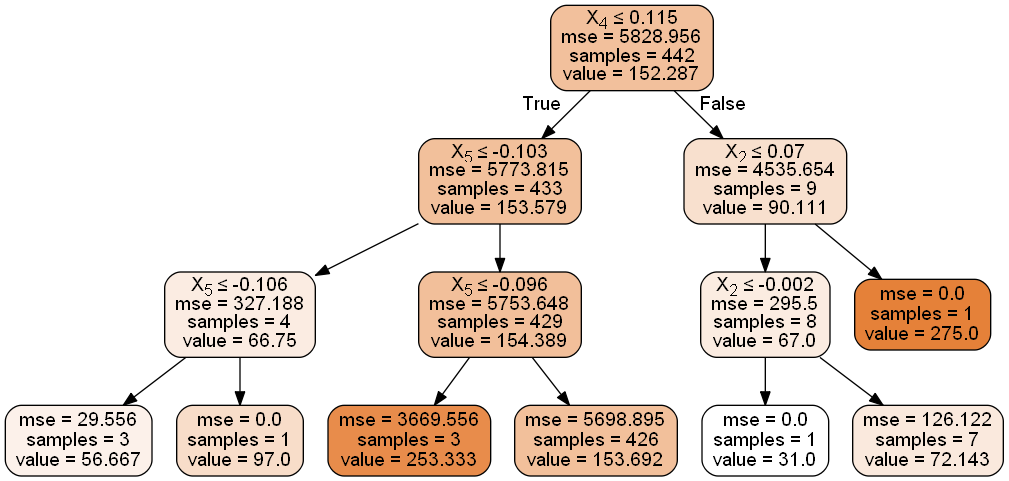

In [35]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, list(diabetes.target[10:]) + list(np.random.normal(loc=150, scale=20, size=10)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Увеличим дисперсию шума (при небольшом увеличении дерево особо не поменялось)

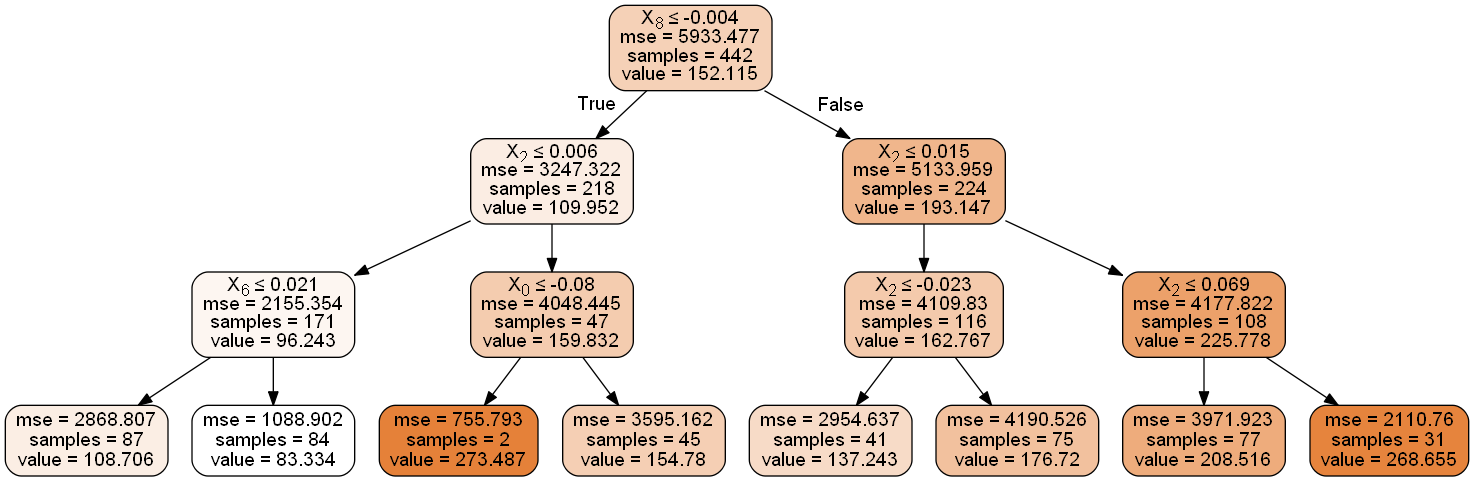

In [36]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=1, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Увеличим дисперcию более существенно (дерево конечно меняется, но сильных изменений не по-прежнему происходит)

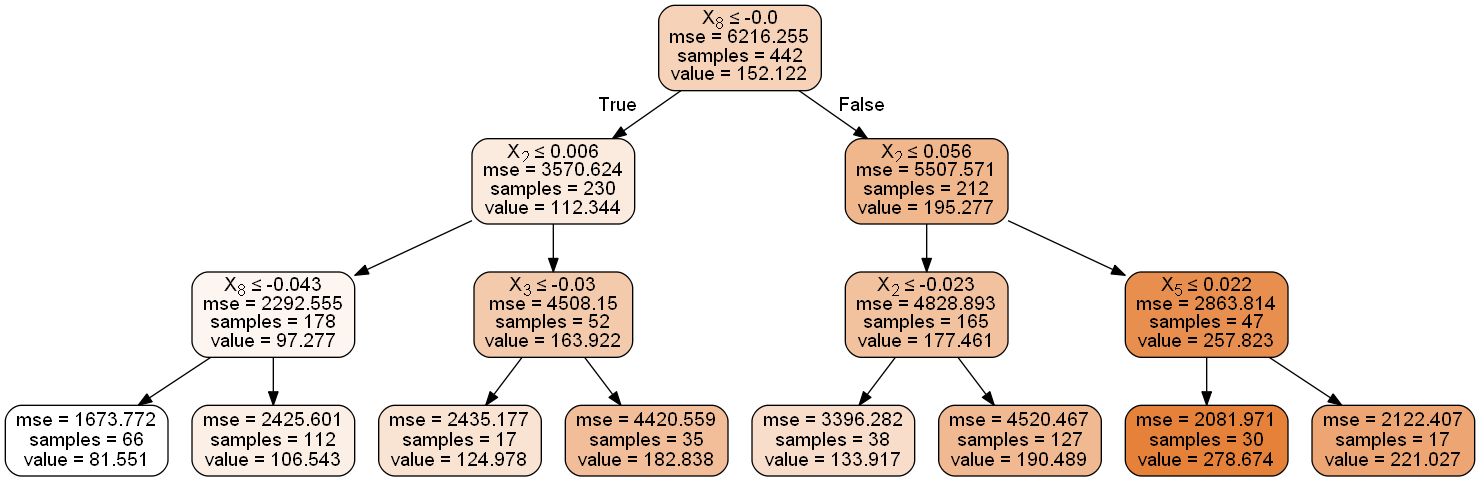

In [37]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=10, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

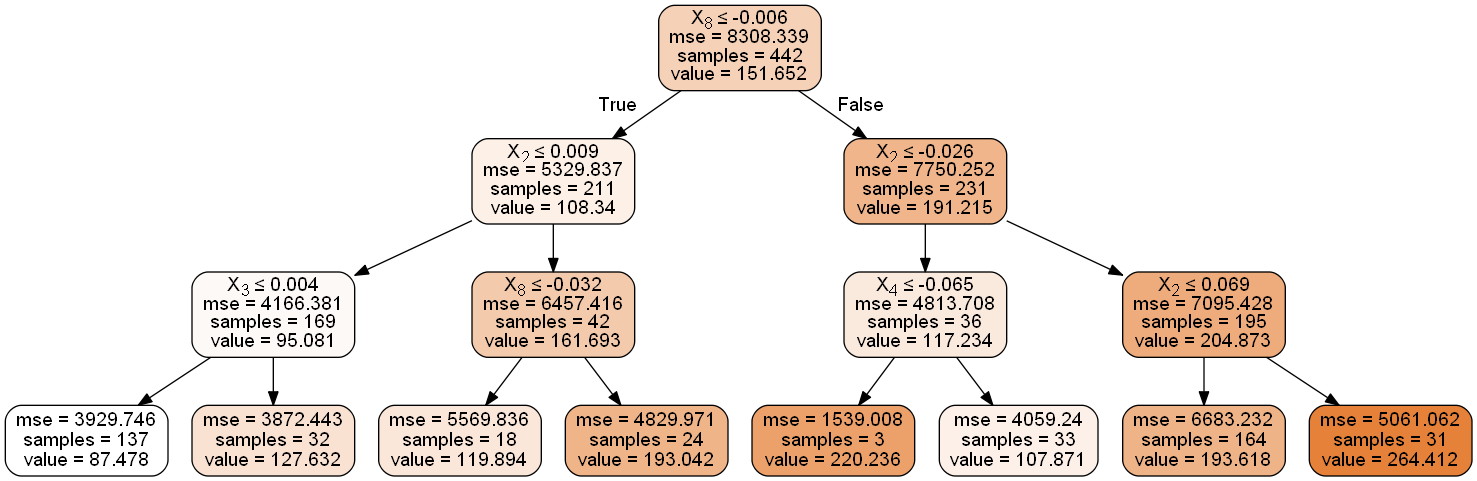

In [38]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=50, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

# Часть 2: Сравнение с линейными моделями

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

make_regression - генерируется случайная линейная зависимость


make_friedman1 - y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1) - нелинейная зависимость.

## Линейная зависимость

In [40]:
X_data, y_data = make_regression(n_samples=1000, noise=100, n_features=10)

In [41]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=1), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-64798.101134203338

In [42]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=5), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-51690.832031613885

In [43]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=10), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-57810.904934936239

In [44]:
np.mean(cross_val_score(DecisionTreeRegressor(min_samples_leaf=2), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-53434.528750224177

In [45]:
np.mean(cross_val_score(DecisionTreeRegressor(min_samples_leaf=10), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-49150.456086590035

In [46]:
np.mean(cross_val_score(DecisionTreeRegressor(min_samples_leaf=20), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-48000.90545313387

In [47]:
gs = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid ={
        'criterion': ['mse', 'mae'],
        #'max_depth': range(1, 21),
        'min_samples_leaf': range(1, 21)
    },
    scoring='neg_mean_squared_error'
)
gs.fit(X_data, y_data)

print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'mae', 'min_samples_leaf': 14}
-47614.4343313


In [48]:
np.mean(cross_val_score(LinearRegression(), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-9711.2512625478212

## Нелинейная зависимость

In [49]:
X_data, y_data = make_friedman1(n_samples=1000, noise=10, n_features=10)

In [50]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=1), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-109.93101305546024

In [51]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=5), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-123.30431277033884

In [52]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=10), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-174.01074964101139

In [53]:
np.mean(cross_val_score(DecisionTreeRegressor(min_samples_leaf=2), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-186.78160867582815

In [54]:
np.mean(cross_val_score(DecisionTreeRegressor(min_samples_leaf=10), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-134.15033857866217

In [55]:
np.mean(cross_val_score(DecisionTreeRegressor(min_samples_leaf=20), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-119.16592537780919

In [56]:
gs = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid ={
        'criterion': ['mse', 'mae'],
        'max_depth': range(1, 21),
        #'min_samples_leaf': range(1, 21)
    },
    scoring='neg_mean_squared_error'
)
gs.fit(X_data, y_data)

print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'mae', 'max_depth': 2}
-104.873829746


In [57]:
np.mean(cross_val_score(LinearRegression(), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

-97.132778604540803

## Оценка времени работы

In [58]:
X_data, y_data = make_regression(n_samples=100000, noise=1000, n_features=30, random_state=42)

In [59]:
%%time
DecisionTreeRegressor(max_depth=1).fit(X_data, y_data)

Wall time: 514 ms


DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [60]:
%%time
DecisionTreeRegressor(max_depth=2).fit(X_data, y_data)

Wall time: 997 ms


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
%%time
DecisionTreeRegressor(max_depth=4).fit(X_data, y_data)

Wall time: 1.86 s


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [62]:
%%time
DecisionTreeRegressor(max_depth=10).fit(X_data, y_data)

Wall time: 4.22 s


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
%%time
LinearRegression().fit(X_data, y_data)

Wall time: 269 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Преимущества и Недостатки решающих деревьев:

** Преимущества**
 * хорошо интерпретируются
 * легко обобщаются для регрессии и классификации
 * допускаются разнотипные данные
 
** Недостатки **
 * Сравнение с линейными алгоритмами на линейно разделимой выборке - фиаско
 * Переобучение
 * Неустойчивость к шуму, составу выборки, критерию
 
** Способы устранения недостатков **
 * прунинг (усечение)
 * композиции (леса) деревьев

#### Pruning

<img src='pics\pruning.png' Width=800>